<a href="https://colab.research.google.com/github/wandersonxs/Financas-Machine-Learning-Course/blob/main/S6_Python_para_finan%C3%A7as_aloca%C3%A7%C3%A3o_e_otimiza%C3%A7%C3%A3o_de_portf%C3%B3lios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - alocação e otimização de portfólios

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


## Alocação aleatória de ativos

In [ ]:
len(dataset.columns) - 1

6

In [ ]:
dataset.loc[len(dataset) - 1]['BOVA']

92.41000366210938

In [ ]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos * 100})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [ ]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, 10)

<ipython-input-7-619ceb59fae1>:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset['soma valor'] = dataset.sum(axis = 1)


In [ ]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,soma valor,taxa retorno
0,1330.859777,35.806036,1093.315674,1292.008683,860.138954,387.870876,5000.000000,0.000000
1,1318.430187,35.334904,1100.763673,1316.288069,833.710425,380.156147,4984.683405,-0.306332
2,1350.392100,34.863773,1084.437134,1298.945650,781.573105,382.290029,4932.501791,-1.046839
3,1291.795217,34.557537,1072.014590,1342.304468,776.046225,395.175284,4911.893321,-0.417810
4,1266.935952,33.332592,1090.113087,1331.899017,794.066437,398.129839,4914.476924,0.052599
...,...,...,...,...,...,...,...,...
1441,1651.367094,33.379707,7682.429339,141236.798956,686.048657,786.246983,152076.270736,-0.066212
1442,1502.211333,30.081783,7304.030139,136686.134989,661.976774,758.588795,146943.023813,-3.375442
1443,1474.688596,29.869773,7386.170428,140737.335967,686.048657,762.528265,151076.641685,2.813075
1444,1393.007983,28.927508,6998.542117,136686.134989,649.940833,744.062131,146500.615560,-3.028944


In [ ]:
datas

0       2015-01-02
1       2015-01-05
2       2015-01-06
3       2015-01-07
4       2015-01-08
           ...    
1441    2020-10-27
1442    2020-10-28
1443    2020-10-29
1444    2020-10-30
1445    2020-11-03
Name: Date, Length: 1446, dtype: object

In [ ]:
acoes_pesos

,Ações,Pesos
0,GOL,26.617196
1,CVC,0.716121
2,WEGE,21.866313
3,MGLU,25.840174
4,TOTS,17.202779
5,BOVA,7.757418


In [ ]:
soma_valor

150607.25846015807

## Visualização dos dados

In [ ]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio')
figura.show()

In [ ]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [ ]:
figura = px.line(x = datas, y = dataset['soma valor'], title = 'Evolução do patrimônio')
figura.show()

## Mais cálculos no portfólio

### Retorno acumulado em todo o período

In [ ]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

29.121451692031616

### Desvio padrão

In [ ]:
dataset['taxa retorno'].std()

2.8167443147613396

### Sharpe ratio

In [ ]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

1.5341112767145646

In [ ]:
dinheiro_total = 5000

In [ ]:
soma_valor - dinheiro_total

145607.25846015807

In [ ]:
# Taxa selic: https://www.infomoney.com.br/guias/taxa-selic/
taxa_selic_2015 = 12.75
taxa_selic_2016 = 14.25
taxa_selic_2017 = 12.25
taxa_selic_2018 = 6.50
taxa_selic_2019 = 5.0
taxa_selic_2020 = 2.0

In [ ]:
valor_2015 = dinheiro_total + (dinheiro_total * taxa_selic_2015 / 100)
valor_2015

5637.5

In [ ]:
valor_2016 = valor_2015 + (valor_2015 * taxa_selic_2016 / 100)
valor_2016

6440.84375

In [ ]:
valor_2017 = valor_2016 + (valor_2016 * taxa_selic_2017 / 100)
valor_2017

7229.8471093749995

In [ ]:
valor_2018 = valor_2017 + (valor_2017 * taxa_selic_2018 / 100)
valor_2018

7699.787171484374

In [ ]:
valor_2019 = valor_2018 + (valor_2018 * taxa_selic_2019 / 100)
valor_2019

8084.7765300585925

In [ ]:
valor_2020 = valor_2019 + (valor_2019 * taxa_selic_2020 / 100)
valor_2020

8246.472060659764

In [ ]:
rendimentos = valor_2020 - dinheiro_total
rendimentos

3246.472060659764

In [ ]:
ir = rendimentos * 15 / 100
ir

486.9708090989646

In [ ]:
valor_2020 - ir

7759.5012515608

In [ ]:
taxa_selic_historico = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.0])
taxa_selic_historico.mean() / 100

0.08791666666666666

In [ ]:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean() / 100) / dataset['taxa retorno'].std() * np.sqrt(246)

1.0445677178791335

# Observação feita por um prossional da área de finanças sobre a forma de cálculo de Sharpe ratio
"A taxa de Selic é a media de determinadas operações considerando a liquidez diária das mesma. Se todas elas estiverem, no mesmo padrão, no caso, considerando a taxa mensal, anual ou diária. O retorno da carteira calculado anualizado está na mesma forma do cálculo do sharpe ratio que faz sentido. O único dado que está um pouco desconexo é o desvio padrão ser calculado pela base diária e não pelo valor da taxa anual."

No momento não esta programada uma atualização na estrutura do curso.

## Otimização de portfólio - randômico

- Markowitz: https://pt.wikipedia.org/wiki/Teoria_moderna_do_portf%C3%B3lio

In [ ]:
import sys
1 - sys.maxsize

-9223372036854775806

In [ ]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
  dataset = dataset.copy()
  dataset_original = dataset.copy()

  lista_retorno_esperado = []
  lista_volatilidade_esperada = []
  lista_sharpe_ratio = []

  melhor_sharpe_ratio = 1 - sys.maxsize
  melhores_pesos = np.empty
  melhor_volatilidade = 0
  melhor_retorno = 0

  for _ in range(repeticoes):
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()

    for i in dataset.columns[1:]:
      dataset[i] = dataset[i] / dataset[i][0]

    for i, acao in enumerate(dataset.columns[1:]):
      dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset.drop(labels = ['Date'], axis = 1, inplace=True)

    retorno_carteira = np.log(dataset / dataset.shift(1))
    matriz_covariancia = retorno_carteira.cov()

    dataset['soma valor'] = dataset.sum(axis = 1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
      dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

    #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
    volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
    sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

    if sharpe_ratio > melhor_sharpe_ratio:
      melhor_sharpe_ratio = sharpe_ratio
      melhores_pesos = pesos
      melhor_volatilidade = volatilidade_esperada
      melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(volatilidade_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)

    dataset = dataset_original.copy()

  return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [ ]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(pd.read_csv('acoes.csv'), 5000, taxa_selic_historico.mean() / 100, 1000)

In [ ]:
sharpe_ratio, melhores_pesos

(1.5619692345460736,
 array([0.00414986, 0.04300667, 0.23449471, 0.34400729, 0.09446242,
        0.27987905]))

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhores_pesos)

<ipython-input-7-619ceb59fae1>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
acoes_pesos, soma_valor

(  Ações      Pesos
 0   GOL   0.414986
 1   CVC   4.300667
 2  WEGE  23.449471
 3  MGLU  34.400729
 4  TOTS   9.446242
 5  BOVA  27.987905,
 198082.38267450323)

In [ ]:
print(ls_retorno)

[0.2700275714598434, 0.5468515787495575, 0.32127214247872904, 0.5022743823458814, 0.454827488846442, 0.5398113929191144, 0.5549806485796855, 0.3377354188132595, 0.4628694954992023, 0.5342248042722882, 0.6463871106687641, 0.20612923748944986, 0.5006090986384023, 0.46238740989658983, 0.6323088806642335, 0.48051742133672937, 0.5881936437125227, 0.5349072746824683, 0.41357010711034586, 0.57328981675946, 0.30846309422018336, 0.5819199748805749, 0.5438750798236747, 0.49689894920650046, 0.5976026598833571, 0.5379316606689512, 0.5696453756556064, 0.530773227361785, 0.3970818871843879, 0.11398691755756157, 0.4977445821866002, 0.4560348124189272, 0.5682784635789176, 0.5552662881095236, 0.42396678120742326, 0.3357110527775064, 0.502786971569736, 0.5540565066835217, 0.4914757228060047, 0.4911730996042097, 0.41941313180884193, 0.41668706146764456, 0.28858213070264843, 0.5790423004576719, 0.35008703121578116, 0.17709747637621467, 0.4424244236318081, 0.6198388330427768, 0.5315516521419433, 0.51088494

In [ ]:
print(ls_volatilidade)

[0.3455910938373506, 0.33695526555086824, 0.4038357603492712, 0.35212303400079853, 0.4038809052064427, 0.3621335934514904, 0.3584399240420495, 0.388748837343725, 0.3564379693839108, 0.4132636784947431, 0.38722267439592944, 0.35390316819249995, 0.4062213209295673, 0.34793695206266495, 0.4215466328083609, 0.40046136068385574, 0.35708362499629887, 0.3885751377467397, 0.3789182222834082, 0.37944277395023623, 0.30379424502441604, 0.345002505141084, 0.34037513705236405, 0.42459877765039866, 0.37437934825799557, 0.4448175523143701, 0.34141777933625933, 0.3747448565717098, 0.3635143280271026, 0.3818408172036827, 0.392036238019477, 0.31011615535321574, 0.3385773457096268, 0.3447145154487648, 0.344641869825529, 0.2806382034674432, 0.3441396474189091, 0.36695340485052397, 0.3581501995474016, 0.32744893185019697, 0.354198092145302, 0.3829765128996305, 0.4040274252128353, 0.3974740955798952, 0.4158483318147268, 0.40007574882350466, 0.427427246569291, 0.4029915205378911, 0.4327737222677917, 0.382861

In [ ]:
print(ls_sharpe_ratio)

[0.5269548551470649, 1.3620054618603608, 0.5778474784160692, 1.1767412968453381, 0.9084629093624265, 1.2478674567179622, 1.3030467606566796, 0.6426225062268353, 1.0519441278397672, 1.0799597468406574, 1.4422462343490496, 0.33402518385617663, 1.015930013292656, 1.0762603425993091, 1.2914163502405502, 0.9803711249435658, 1.4010078929019536, 1.1503324958148384, 0.8594293472645659, 1.2791735234268813, 0.7259730266970374, 1.431883249693774, 1.3395761426806636, 0.9632205839192901, 1.361415888959375, 1.0116844348000036, 1.4109655036871684, 1.1817548738267338, 0.8504897790292073, 0.06827518095580767, 1.0453827370406832, 1.1870331145211759, 1.4187653220136662, 1.3557584624321384, 0.9750704831971754, 0.8829674044702411, 1.2055289415638362, 1.270297083649446, 1.1267871877478224, 1.2315093857811907, 0.9359069754847412, 0.8584609857971662, 0.4966629775943412, 1.235616708742936, 0.6304470752714705, 0.2229098113839701, 0.829399061034523, 1.3199338925695743, 1.0250968639005402, 1.104753914423725, 1.43

In [ ]:
melhor_retorno, melhor_volatilidade

(0.6259296653087528, 0.34444532372523906)

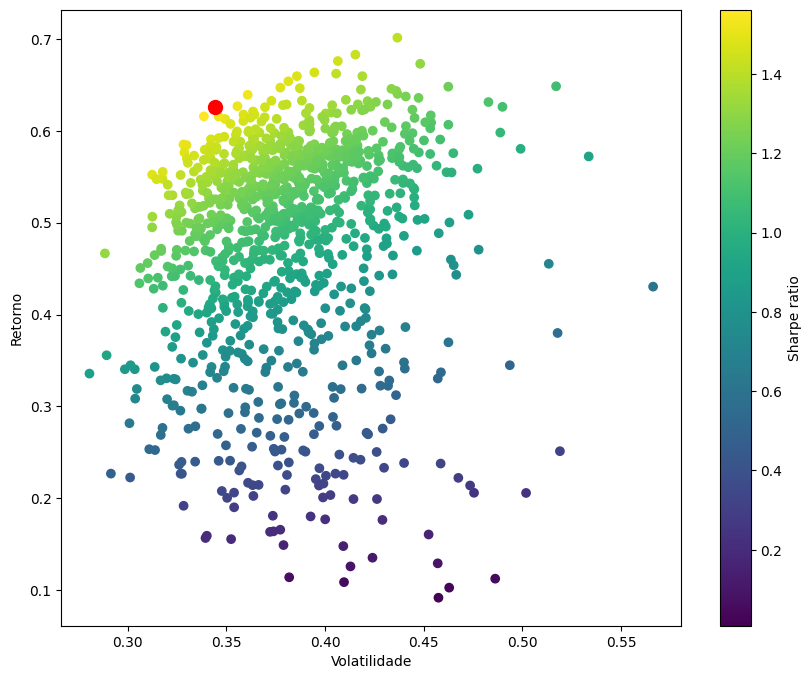

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c = ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c = 'red', s = 100);

## Otimização de portfólio com algoritmos de otimização

- Biblioteca mlrose: https://mlrose.readthedocs.io/en/stable/

In [ ]:
#!pip install scikit-learn

In [ ]:
#!pip install scipy==1.11.3

In [ ]:
#!pip install mlrose==1.3.0

In [ ]:
!pip install https://github.com/gkhayes/mlrose/archive/refs/heads/master.zip

     \ 218.4 kB 2.3 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose: filename=mlrose-1.3.0-py3-none-any.whl size=27711 sha256=30e7b50eaf353387769195e9452a5cd99135aefa21dea665866100855856461f
  Stored in directory: /tmp/pip-ephem-wheel-cache-lj8y_p7d/wheels/e1/d4/4c/90cb7cdd2dab1e4aa18364e040225ad5941d9c830aad84a6ec
Successfully built mlrose


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [ ]:
taxa_selic_historico

array([12.75, 14.25, 12.25,  6.5 ,  5.  ,  2.  ])

In [ ]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100

In [ ]:
def fitness_function(solucao):
  dataset = dataset_original.copy()
  pesos = solucao / solucao.sum()

  for i in dataset.columns[1:]:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset.drop(labels = ['Date'], axis = 1, inplace=True)
  dataset['soma valor'] = dataset.sum(axis = 1)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)

  return sharpe_ratio

In [ ]:
np.random.seed(10)
pesos = np.random.random(len(dataset_original.columns) - 1)
pesos = pesos / pesos.sum()
pesos

array([0.26617196, 0.00716121, 0.21866313, 0.25840174, 0.17202779,
       0.07757418])

In [ ]:
fitness_function(pesos)

1.0445677178791335

In [ ]:
def visualiza_alocacao(solucao):
  colunas = dataset_original.columns[1:]
  for i in range(len(solucao)):
    print(colunas[i], solucao[i] * 100)

In [ ]:
visualiza_alocacao(pesos)

GOL 26.617195545614496
CVC 0.7161207195395352
WEGE 21.866313475981215
MGLU 25.84017365648649
TOTS 17.202779081759033
BOVA 7.757417520619242


In [ ]:
fitness = mlrose.CustomFitness(fitness_function)

In [ ]:
problema_maximizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = True, min_val = 0, max_val = 1)

In [ ]:
problema_minimizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = False, min_val = 0, max_val = 1)

### Hill climb

In [ ]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state = 1)
melhor_solucao, melhor_custo

(array([0.        , 0.22032449, 0.10011437, 0.90233257, 0.        ,
        0.        ]),
 1.2706811570370855)

In [ ]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0.        , 0.18018453, 0.08187497, 0.7379405 , 0.        ,
        0.        ]),
 0.9999999999999999)

In [ ]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 18.018452678413226
WEGE 8.187496981804403
MGLU 73.79405033978236
TOTS 0.0
BOVA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

<ipython-input-7-619ceb59fae1>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



404578.300886321

In [ ]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizacao, random_state = 1)
pior_solucao, pior_custo

(array([0.        , 0.32032449, 0.        , 0.        , 0.64675589,
        0.49233859]),
 -0.3966947924158752)

In [ ]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao, pior_solucao.sum()

(array([0.        , 0.21948769, 0.        , 0.        , 0.44315985,
        0.33735247]),
 0.9999999999999999)

In [ ]:
visualiza_alocacao(pior_solucao)

GOL 0.0
CVC 21.94876851988625
WEGE 0.0
MGLU 0.0
TOTS 44.31598465629341
BOVA 33.73524682382033


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=pior_solucao)
soma_valor

<ipython-input-7-619ceb59fae1>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



5926.919066862072

### Simulated annealing

In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.        , 0.09090909, 0.18181818, 0.72727273, 0.        ,
        0.        ]),
 1.2706649817449553)

In [ ]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 9.090909090909092
WEGE 18.181818181818183
MGLU 72.72727272727273
TOTS 0.0
BOVA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

<ipython-input-7-619ceb59fae1>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



401733.4517539583

### Algoritmo genético

In [ ]:
problema_maximizacao_ag = mlrose.ContinuousOpt(length = 6, fitness_fn = fitness,
                                               maximize = True, min_val = 0.1, max_val = 1)

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.05486587, 0.15198019, 0.09752971, 0.54073661, 0.06577971,
        0.08910791]),
 1.232307865847568)

In [ ]:
visualiza_alocacao(melhor_solucao)

GOL 5.4865870615535615
CVC 15.19801923856264
WEGE 9.752971254516094
MGLU 54.07366085916957
TOTS 6.577970925624096
BOVA 8.91079066057405


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

<ipython-input-7-619ceb59fae1>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



299210.8074659617

## Exercício

In [ ]:
dataset_original = pd.read_csv('acoes_ex.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100
dataset_original

In [ ]:
sharpe_ratio, melhores_pesos, _, _, _, _, _ = alocacao_portfolio(dataset_original, 5000,
                                                                 taxa_selic_historico.mean() / 100,
                                                                 1000)

In [ ]:
sharpe_ratio

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhores_pesos)

In [ ]:
acoes_pesos, soma_valor

In [ ]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor